In [ ]:
#

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
#-------------------Load and Preprocess Data----------------------

# Load data
data = pd.read_csv('D:\Datasets\synthetic_sales_data.xls')  # Replace with your data file
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Aggregate data (e.g., weekly if not already aggregated)
# data = data.resample('W').sum()  # Uncomment if your data is not already weekly

# Check the data
print(data.head())


                sales
date                 
2018-01-07  57.369665
2018-01-14  53.580659
2018-01-21  63.931879
2018-01-28  75.074608
2018-02-04  59.757906


C:\Users\MANISH\AppData\Local\Temp\ipykernel_15948\3583652823.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


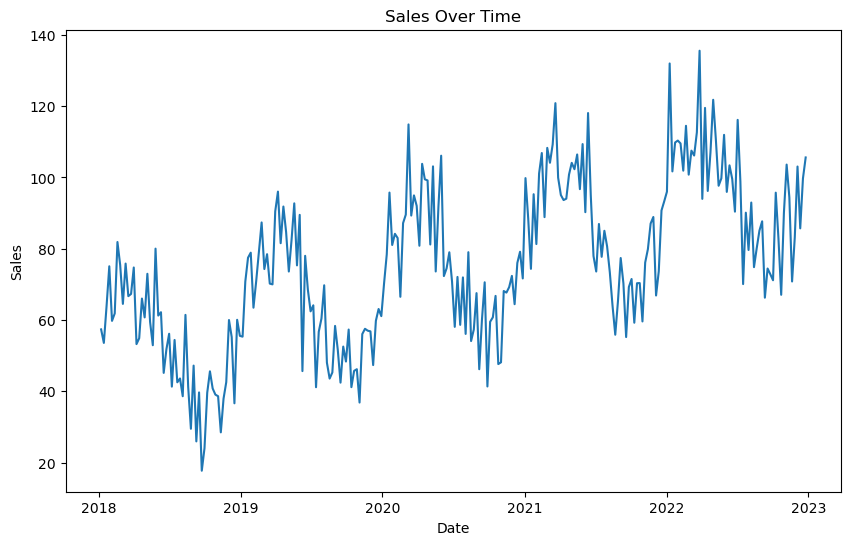

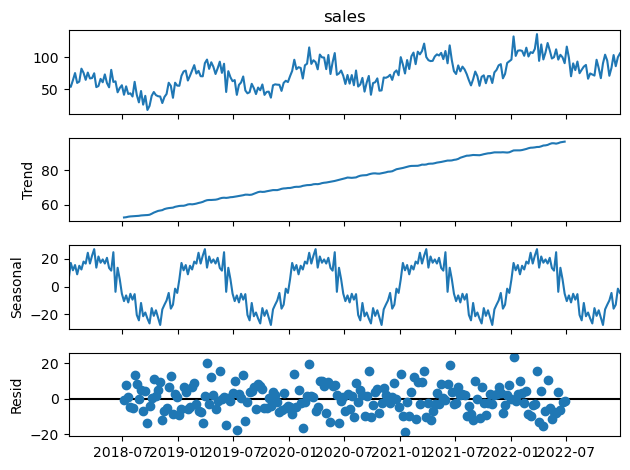

In [10]:
#-----------------------Exploratory Data Analysis (EDA)--------------------------

# Plot sales data
plt.figure(figsize=(10, 6))
plt.plot(data['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Check for seasonality and trends
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['sales'], model='additive')
decomposition.plot()
plt.show()


In [11]:
#------------------------ Feature Engineering-----------------------

# Example: Adding lag features
data['lag_1'] = data['sales'].shift(1)
data['lag_2'] = data['sales'].shift(2)
data.dropna(inplace=True)


D:\ANOCONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
D:\ANOCONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
D:\ANOCONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 18.81397650223318
ARIMA MAE: 15.708490005974474


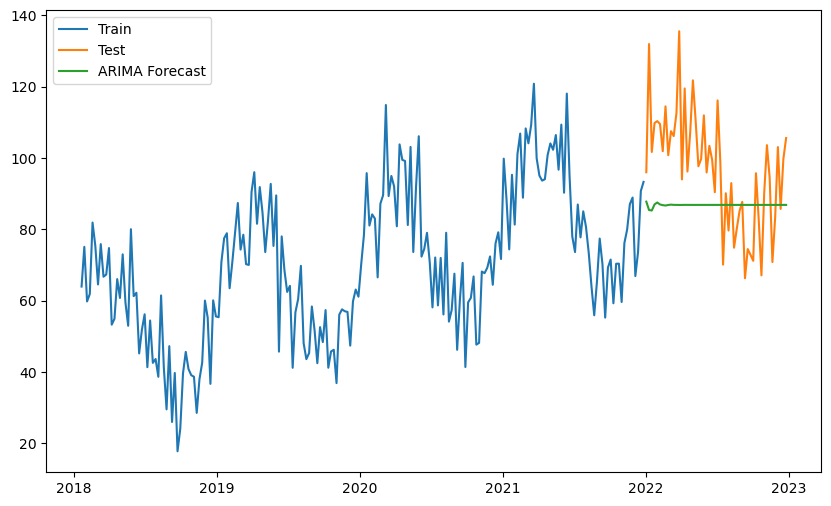

In [12]:
#-----------------------ARIMA MODEL--------------------------

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train['sales'], order=(5,1,0))
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))

# Evaluate ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test['sales'], arima_forecast))
arima_mae = mean_absolute_error(test['sales'], arima_forecast)

print(f'ARIMA RMSE: {arima_rmse}')
print(f'ARIMA MAE: {arima_mae}')

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()


D:\ANOCONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
D:\ANOCONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
D:\ANOCONDA\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA RMSE: 11.566289276734224
SARIMA MAE: 9.117083922697114


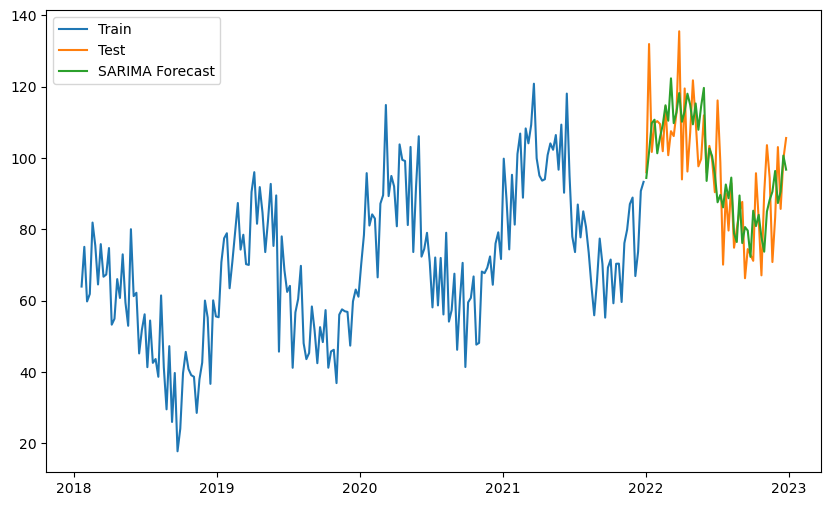

In [13]:
#---------------------------SARIMA MODEL--------------------------------

# Fit SARIMA model
sarima_model = SARIMAX(train['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test)).predicted_mean

# Evaluate SARIMA model
sarima_rmse = np.sqrt(mean_squared_error(test['sales'], sarima_forecast))
sarima_mae = mean_absolute_error(test['sales'], sarima_forecast)

print(f'SARIMA RMSE: {sarima_rmse}')
print(f'SARIMA MAE: {sarima_mae}')

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.show()
